# Députés correspondants

In [15]:
import networkx as nx

In [70]:
# Clusters choisis
clusters = xmeans_clusters
clusters.max()

51

In [69]:
# Dictionnaire des clusters
clusters_dic = dict()
for i,c in enumerate(clusters):
    if c in clusters_dic :
        clusters_dic[c].add(i)
    else :
        clusters_dic[c] = {i}

In [25]:
# Fonction attribuant à un point sa qualité d'appartenance à un cluster
def score_local(point,cluster):
    return 1

In [64]:
# Construire la liste d'adjacence : {auteur_1 : {auteur_2 : [liste des qualités],},} 
list_adj_local = dict()
for id_groupe in clusters_dic : 
    for i,lettre_1 in enumerate(list(clusters_dic[id_groupe])) :
        for j, lettre_2 in enumerate(list(clusters_dic[id_groupe])[i+1:]) :
            auteur_1 = dfhi.loc[lettre_1,'ref_auteur']
            auteur_2 = dfhi.loc[lettre_2,'ref_auteur']
            if auteur_1 != auteur_2 :
                l1,l2 = (auteur_1,auteur_2) if auteur_1 > auteur_2 else (auteur_2,auteur_1)
                score = score_local('rien','rien')
                if l1 in list_adj_local :
                    if l2 in list_adj_local[l1] :
                        list_adj_local[l1][l2].append(score)
                    else : 
                        list_adj_local[l1][l2] = [score]
                else : 
                    list_adj_local[l1] = {l2 : [score]}

In [66]:
# Fonction atribuant ...
def score_total(scores_locaux):
    return sum(scores_locaux)

In [67]:
# Construire la liste d'adjacence : {auteur_1 : {auteur_2 : score_total,},} 
list_adj_total = dict()
for l1 in list_adj_local :
    list_adj_total[l1] = dict()
    for l2 in list_adj_local[l1] :
        list_adj_total[l1][l2] = score_total(list_adj_local[l1][l2])  

In [122]:
ref_nom = dfhi['ref_auteur'].unique()
ref_nom[:5]
# mat_adj = pd.DataFrame(columns = liste_auteurs, index = liste_auteurs).fillna(0)

array(['PA695100', 'PA267355', 'PA267241', 'PA267527', 'PA608826'],
      dtype=object)

In [73]:
G = nx.Graph()
for l1 in list_adj_total : 
    for l2 in list_adj_total[l1] :
        G.add_edge(l1, l2, weight = list_adj_total[l1][l2])

In [75]:
from networkx.drawing.nx_pydot import write_dot

In [127]:
b = 'PA695100'
# len(list(G.neighbors(b)))
G.degree(weight='weight')[b]

364

In [157]:
lala = dfhi.groupby('ref_auteur').first()
# Comment afficher le nom des auteurs
def afficher(ref_auteur):
    return "{} ({})".format(lala.loc[ref_auteur,'nom_auteur'], lala.loc[ref_auteur,'groupe_auteur'])

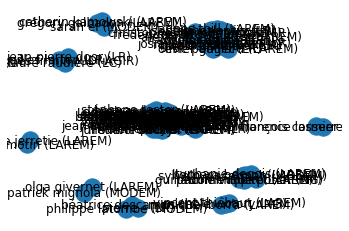

In [158]:
seuil_min = 1
seuil_div = 0.05
def sum_weight(a):
#     return G.degree(weight='weight')[a]
    return G.degree[a]
    
G2 = nx.Graph()
def conditions_g2(a,b,w):
#     if w['weight'] < seuil_min :
#         return False
    if w['weight']/sum_weight(a) < seuil_div :
        return False
    if w['weight']/sum_weight(b) < seuil_div :
        return False
    return True

for a1,a2,w in G.edges(data=True):
    if conditions_g2(a1,a2,w) :
        G2.add_edge(afficher(a1), afficher(a2))

plt.plot(figsize = (20,10))
nx.draw(G2,with_labels=True)
write_dot(G2, 'mieux.dot')

In [159]:
# Créer le graph ps
!dot -Tps mieux.dot -o mieux.ps

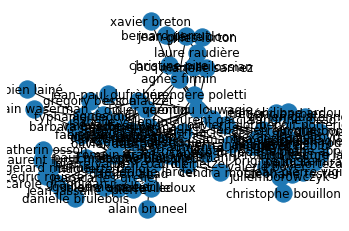

In [115]:
seuil_max = 7
G3 = nx.Graph()
def conditions_g3(a):
    if len(list(G2.neighbors(a))) > seuil_max :
        return False
    return True

for a1,a2,w in G2.edges(data=True):
    if conditions_g3(a1) and conditions_g3(a2):
        G2.add_edge(a1, a2)

plt.plot(figsize = (20,10))
nx.draw(G2,with_labels=True)
write_dot(G2, 'mieux.dot')

In [121]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 20]
pos = nx.spring_layout(G)  # positions for all nodes

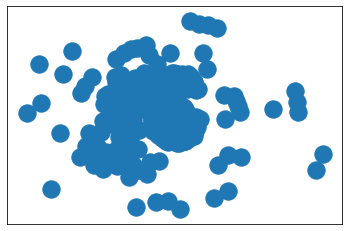

In [122]:
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge)
# nodes
nx.draw_networkx_nodes(G, pos)

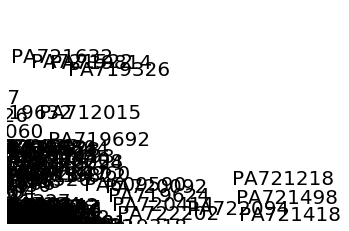

In [123]:
# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()